# Exercise 1: Token Count by Word Length

Using gbt4 tokenizer to count the tokens by word lengths

In [1]:
# Importing the libs
import numpy as np
import matplotlib.pyplot as plt
import re
import requests

In [5]:
import tiktoken

In [7]:
# gbt4 tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')
tokenizer.n_vocab

100277

In [8]:
# The Time Machine book
text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text

# split by punctuation
words = re.split(r'([,.:;—?_!"“()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]
print(f'There are {len(words)} words.')

There are 37786 words.


In [11]:
for t in words[:20]:
  print(f'"{t}" has {len(tokenizer.encode(t))} tokens')

"***" has 1 tokens
"START" has 1 tokens
"OF" has 1 tokens
"THE" has 1 tokens
"PROJECT" has 1 tokens
"GUTENBERG" has 5 tokens
"EBOOK" has 2 tokens
"35" has 1 tokens
"***" has 1 tokens
"The" has 1 tokens
"Time" has 1 tokens
"Machine" has 1 tokens
"An" has 1 tokens
"Invention" has 2 tokens
"by" has 1 tokens
"H" has 1 tokens
"." has 1 tokens
"G" has 1 tokens
"." has 1 tokens
"Wells" has 2 tokens


In [44]:
tokens_and_length = np.zeros((len(words),2), dtype=int)

for i,w in enumerate(words):

    tokens = len(tokenizer.encode(w))
    length = len(w)

    tokens_and_length[i,0] = length
    tokens_and_length[i,1] = tokens
print(tokens_and_length.shape)
tokens_and_length[:10]

(37786, 2)


array([[3, 1],
       [5, 1],
       [2, 1],
       [3, 1],
       [7, 1],
       [9, 5],
       [5, 2],
       [2, 1],
       [3, 1],
       [3, 1]])

In [45]:
uniq_token_lengths, uniq_token_counts = np.unique(tokens_and_length[:,0], return_counts=True)
uniq_word_lengths, uniq_word_counts = np.unique(tokens_and_length[:,1], return_counts=True)


In [46]:
print(f"Unique ammount of tokens: {uniq_token_lengths}.")
print(f"Counts: {uniq_token_counts}.")

Unique ammount of tokens: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20].
Counts: [7233 5283 7341 5804 3597 2544 2210 1444 1007  679  278  222   79   44
    9    5    3    2    1    1].


In [47]:
print(f"Unique ammount of word lengths: {uniq_word_lengths}.")
print(f"Counts: {uniq_word_counts}.")

Unique ammount of word lengths: [1 2 3 4 5 6 7].
Counts: [30766  5556  1330   115    16     1     2].


In [83]:
# Adding some noise for better visualization

scatterArray = np.zeros((len(words),2))
n = 15
i = 0
while i<len(words):

    for x,y in tokens_and_length:

        x = x + (np.random.randn()/n)
        y = y + (np.random.randn()/n)

        scatterArray[i,0] = x
        scatterArray[i,1] = y

        i+=1
    
scatterArray[:10]

array([[2.97010222, 1.0284301 ],
       [4.92951786, 0.95407818],
       [2.05094883, 0.97710448],
       [2.91827309, 0.99659204],
       [7.01824476, 0.92133398],
       [9.03814444, 5.09901425],
       [5.0384693 , 2.09776569],
       [2.0277634 , 1.12743438],
       [2.98267446, 1.04237658],
       [3.0067124 , 1.06362645]])

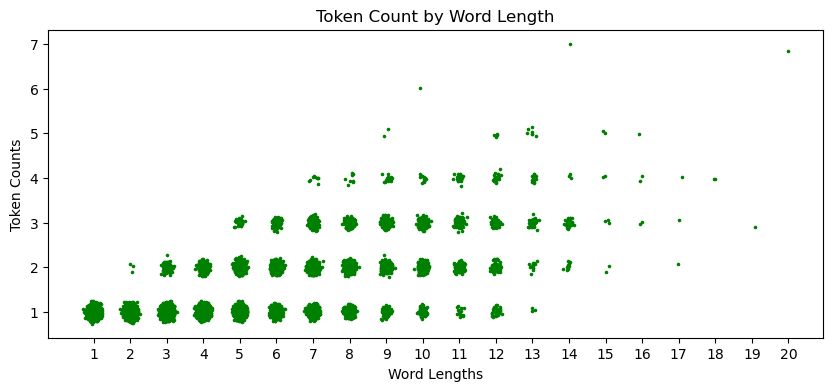

In [143]:
plt.figure(figsize=(10,4))
plt.scatter(scatterArray[:,0],scatterArray[:,1], marker='.', s=10, c="g")
plt.gca().set(xlabel="Word Lengths", ylabel="Token Counts", title="Token Count by Word Length", xticks = np.arange(1,max(uniq_token_lengths)+1))
plt.show()

# Exercise 2: Encoding of 14-Character Words

In [105]:
words_14 = []

for w in words:
    if len(w) == 14:
        words_14.append(w)


for w14 in set(words_14):

    decoded = []
    encoded = tokenizer.encode(w14)
    
    for t in encoded:
        decoded.append( tokenizer.decode([t]) )

    print(f"Tokens of '{w14}': { decoded }")

Tokens of 'incredibleness': ['in', 'cred', 'ib', 'leness']
Tokens of 'self-restraint': ['self', '-re', 'straint']
Tokens of 'self-deception': ['self', '-de', 'ception']
Tokens of 'interrogations': ['inter', 'rog', 'ations']
Tokens of 'Undergrounders': ['Under', 'ground', 'ers']
Tokens of 'intermittently': ['inter', 'mitt', 'ently']
Tokens of 'potentialities': ['potential', 'ities']
Tokens of 'aforementioned': ['a', 'fore', 'mentioned']
Tokens of 'North-eastward': ['North', '-east', 'ward']
Tokens of 'stratification': ['str', 'at', 'ification']
Tokens of 'ill-controlled': ['ill', '-controlled']
Tokens of 'investigations': ['invest', 'ig', 'ations']
Tokens of 'mathematicians': ['math', 'ematic', 'ians']
Tokens of 'safety-matches': ['s', 'afety', '-m', 'atches']
Tokens of 'Time-Dimension': ['Time', '-D', 'imension']
Tokens of 'south-westward': ['south', '-west', 'ward']
Tokens of 'overwhelmingly': ['over', 'whelming', 'ly']
Tokens of 'disinclination': ['dis', 'incl', 'ination']
Tokens of 

# Exercise 3: Token Efficiency

In [148]:
efficiency = np.zeros(len(words))

i = 0
while i<len(words):
    for x,y in tokens_and_length:

        # efficiency = characters / tokens
        # x: lenght (total characters); y: tokens
        efficiency[i] = x/y

        i+=1
ef_idx = np.argmax(efficiency)
ef_chr = words[ef_idx]

inef_idx = np.argmin(efficiency)
inef_chr = words[inef_idx]

print(f"A very efficient word:\n\t'{ef_chr}' has {len(ef_chr)} letters and {len(tokenizer.encode(ef_chr))} tokens.")

print(f"\nAn inefficient word:\n\t'{inef_chr}' has {len(inef_chr)} letters and {len(tokenizer.encode(inef_chr))} tokens.")

A very efficient word:
	'communication' has 13 letters and 1 tokens.

An inefficient word:
	'H' has 1 letters and 1 tokens.


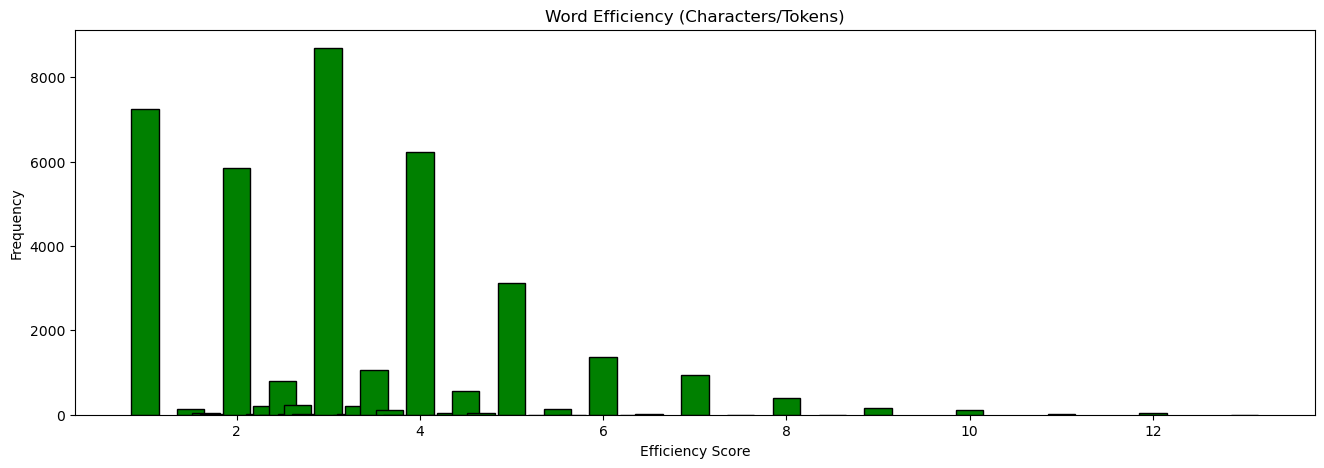

In [149]:
uniq_effs, uniq_effs_counts = np.unique(efficiency, return_counts=True)

plt.figure(figsize=(16,5))
plt.bar(uniq_effs, uniq_effs_counts, edgecolor="k", width=0.3, color="g")
plt.gca().set(xlabel="Efficiency Score", ylabel="Frequency", title="Word Efficiency (Characters/Tokens)" )
plt.show()